In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [28]:
#im_path = "/home/lattard/PROJECTS/DATA/fingertip/unbalanced.jpg"
#im_path = "/home/lattard/PROJECTS/DATA/fingertip/s3_app_data_bad_detections/v16_cropped_fingertips_20200727/TwoFingers_Left_male_adult_white_indoor_adc789750654d2e96cf1dbd9d59b9b6c_06d09f8b-12bc-4ea7-b4b6-7b0b7d345df2_detected_fingertips_1.jpg"
#im_path = "/home/lattard/PROJECTS/DATA/fingertip/s3_app_data_bad_detections/v16_cropped_fingertips_20200727/TwoFingers_Left_male_adult_white_indoor_adc789750654d2e96cf1dbd9d59b9b6c_06d09f8b-12bc-4ea7-b4b6-7b0b7d345df2_detected_fingertips_1.jpg"
im_path = "/home/lattard/PROJECTS/DATA/fingertip/s3_app_data_bad_detections/Result_1595885260_20200724_181228/Result_1595885260_20200724_181228/Result_1595885260_20200724_181228_108_detected_fingertips_0.jpg"
#im_path = "/home/lattard/PROJECTS/DATA/fingertip/s3_app_data_bad_detections/v16_cropped_fingertips_20200727/TwoFingers_Right_male_adult_white_indoor_dbe2a98272d02ac7a097b7c1c8793ead_b649d9a8-6363-41a8-9492-bcf4d010fb52_detected_fingertips_1.jpg"

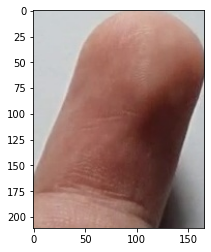

In [29]:
im = cv2.imread(im_path)
plt.imshow(im[...,::-1])

In [30]:
im_lab = cv2.cvtColor(im, cv2.COLOR_BGR2LAB)

In [31]:
# Calculate the mean values of A and B across all pixels
means = [np.mean(im_lab[:, :, i]) for i in range(3)]
thresholds = [means[i] - (np.std(im_lab[:, :, i]) / 3) for i in range(3)]


In [32]:
#If mean is below 256 (which is I think the max value for a channel)
# Apply threshold using only L
if sum(means[1:]) <= 256:
    mask = cv2.inRange(im_lab, (0, 0, 0), (thresholds[0], 256, 256))
else:  # Else, also consider B channel
    mask = cv2.inRange(im_lab, (0, 0, 0), (thresholds[0], 256, thresholds[2]))

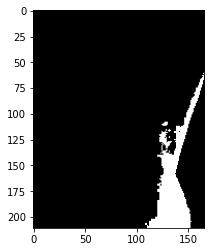

In [33]:
plt.imshow(mask, cmap='gray')